# Trabajo modulo 4 Big data 

En este trabajo voy a usar un dataset de tumores cerebrales, extraído de kaggle.
Sobre dicho dataset voy a realizar una clasificación.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
dat = pd.read_csv('data.csv')
dat

NameError: name 'pd' is not defined

Comprobar el tipo de cada dato para ver si debemos modificar alguno para hacer las operaciones que vamos a realizar. 

In [3]:
dat.dtypes

Unnamed: 0     int64
X53416         int64
M83670         int64
X90908         int64
M97496         int64
               ...  
M13699.1       int64
X54489         int64
T55008         int64
M10065.2       int64
y             object
Length: 7466, dtype: object

In [4]:
dat.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


Ver si existen valores nulos en nuestro dataset.

In [5]:
dat.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


Una vez visto que no hay valores nulos empezamos a preparar las columnas para trabajar con ellas.
Primero eliminaremos la columna Unnamed, ya que no la vamos a necesitar.

In [7]:
dat.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

Observamos que nos queda una columna "y" que contiene strings, así que la vamos a tratar para convertirla en valores.

In [8]:
t= preprocessing.LabelEncoder()
dat['y']= t.fit_transform(dat['y'])

In [9]:
dat['y']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
Name: y, dtype: int32

In [10]:
y = dat["y"]
X = dat.drop(["y"],axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)

In [12]:
print(X_train)
print(y_train)

    X53416  M83670  X90908  M97496  X90908.1  U37019  R48602  T96548  X64559  \
6      225     118      -5     175       -40     108      54     272      32   
27    1412     288     -21     731         8     673     298    1033     179   
0       70     -81      25      10        22     113      36     163       9   
20     624     275     -15     446         0     461     226     622     119   
26     632     185    4723    1107      3344    1114     166    2100      72   
15    -343     -38      28      45        36      -1      37      17       2   
1      108     -30      -7      60         0      24       8     113      -3   
4      -92     -34      14      19        11      -6      27      -8       9   
14    -357       6      20      68        17       4     -18       4       1   
3      871       4      14      78        -6      85      65     227      19   
25    -503     641      -8    2261       -27     130      25     395      63   
31     488     564     -29    1303      

Creamos la tabla Comparación para poder comparar las métricas de rendimiento de forma más sencilla al final.

In [13]:
Comparacion = {'Modelo':[],'precisión':[],'exactitud':[],'exhaustividad':[],'F1':[]}

# Ahora empezaremos con las distintas tareas de clasificación, de las cuales la primera sera la Regresión logística

In [14]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 
print(X_train)
print(X_test)

[[-0.0816561  -0.15467887 -0.22505961 ...  0.42575807  0.42617088
  -0.11370301]
 [ 1.80301215  0.58753023 -0.24095285 ... -0.85330755 -0.85234177
   0.31383566]
 [-0.32775853 -1.02350011 -0.19525979 ...  0.58877624 -0.10654272
   0.15250031]
 ...
 [-0.17850932  0.77089954 -0.23300623 ... -0.91600685 -0.85234177
  -0.5089746 ]
 [-1.00890654 -0.84886268 -0.22207963 ... -0.31409361 -1.27851265
  -0.60577581]
 [-1.03907393 -0.53451529 -0.24889947 ...  0.2627399  -0.31962816
  -0.41217339]]
[[ 1.27428888e+00  1.35156901e+00 -2.33999556e-01 ... -1.01632572e+00
   2.34393986e+00 -6.86443480e-01]
 [-3.30934046e-01  2.46488266e+00 -2.69759342e-01 ... -6.90289386e-01
   2.02431169e+00 -1.72705646e+00]
 [-7.02469322e-01 -7.70275830e-01 -2.00226424e-01 ...  1.37341314e-01
   2.14683582e+02  3.04040299e+00]
 ...
 [ 1.59660367e+00 -1.63410743e-01 -2.24066282e-01 ... -8.65847414e-01
   0.00000000e+00 -5.57375204e-01]
 [ 2.99405717e-01 -1.12391664e+00 -2.15126335e-01 ...  6.89095114e-01
  -8.52341766

In [15]:
X_train1=X_train.copy()
X_test1=X_test.copy()

In [16]:
log_reg=LogisticRegression(random_state=0,max_iter=900)

In [17]:
log_reg.fit(X_train1,y_train)

LogisticRegression(max_iter=900, random_state=0)

In [18]:
log_reg.score(X_test1,y_test)

0.9333333333333333

In [19]:
y_pred = log_reg.predict(X_test1)

In [20]:
print('accuracy=', accuracy_score(y_test, y_pred))
print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))

accuracy= 0.9333333333333333
precision= 0.8571428571428571
recall= 1.0
F1 Score= 0.923076923076923


In [21]:
Comparacion['Modelo'].append("log_reg")
Comparacion['precisión'].append(accuracy_score(y_test, y_pred))
Comparacion['exactitud'].append(precision_score(y_test, y_pred))
Comparacion['exhaustividad'].append(recall_score(y_test, y_pred))
Comparacion['F1'].append(f1_score(y_test, y_pred))

# K-Nearest Neighbors 


In [22]:
X_train2=X_train.copy()
X_test2=X_test.copy()

In [23]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train2,y_train)
knn.score(X_test2,y_test)

0.8

In [24]:
y_pred = knn.predict(X_test2)

In [25]:
print('accuracy=', accuracy_score(y_test, y_pred))
print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))

accuracy= 0.8
precision= 1.0
recall= 0.5
F1 Score= 0.6666666666666666


In [26]:
Comparacion['Modelo'].append("knn")
Comparacion['precisión'].append(accuracy_score(y_test, y_pred))
Comparacion['exactitud'].append(precision_score(y_test, y_pred))
Comparacion['exhaustividad'].append(recall_score(y_test, y_pred))
Comparacion['F1'].append(f1_score(y_test, y_pred))

# Decision Tree


In [27]:
X_train3=X_train.copy()
X_test3=X_test.copy()

In [28]:
tree = DecisionTreeClassifier(random_state = 0).fit(X_train3,y_train)
tree.score(X_test3,y_test)

0.8

In [29]:
y_pred = tree.predict(X_test3)

In [30]:
print('accuracy=', accuracy_score(y_test, y_pred))
print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))

accuracy= 0.8
precision= 0.6666666666666666
recall= 1.0
F1 Score= 0.8


In [31]:
Comparacion['Modelo'].append("tree")
Comparacion['precisión'].append(accuracy_score(y_test, y_pred))
Comparacion['exactitud'].append(precision_score(y_test, y_pred))
Comparacion['exhaustividad'].append(recall_score(y_test, y_pred))
Comparacion['F1'].append(f1_score(y_test, y_pred))

# Random Forest

In [32]:
X_train4=X_train.copy()
X_test4=X_test.copy()

In [33]:
rf = RandomForestClassifier(random_state = 0).fit(X_train4,y_train)
rf.score(X_test4,y_test)

0.9333333333333333

In [34]:
y_pred = rf.predict(X_test4)

In [35]:
print('accuracy=', accuracy_score(y_test, y_pred))
print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))

accuracy= 0.9333333333333333
precision= 0.8571428571428571
recall= 1.0
F1 Score= 0.923076923076923


In [36]:
Comparacion['Modelo'].append("rf")
Comparacion['precisión'].append(accuracy_score(y_test, y_pred))
Comparacion['exactitud'].append(precision_score(y_test, y_pred))
Comparacion['exhaustividad'].append(recall_score(y_test, y_pred))
Comparacion['F1'].append(f1_score(y_test, y_pred))

# Naive bayes

In [37]:
X_train5=X_train.copy()
X_test5=X_test.copy()

In [38]:
nb= GaussianNB()
nb.fit(X_train5,y_train)
nb.score(X_test5,y_test)

0.9333333333333333

In [39]:
y_pred = nb.predict(X_test5)

In [40]:
print('accuracy=', accuracy_score(y_test, y_pred))
print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))

accuracy= 0.9333333333333333
precision= 0.8571428571428571
recall= 1.0
F1 Score= 0.923076923076923


In [41]:
Comparacion['Modelo'].append("nb")
Comparacion['precisión'].append(accuracy_score(y_test, y_pred))
Comparacion['exactitud'].append(precision_score(y_test, y_pred))
Comparacion['exhaustividad'].append(recall_score(y_test, y_pred))
Comparacion['F1'].append(f1_score(y_test, y_pred))

# Bagging

In [42]:
X_train6=X_train.copy()
X_test6=X_test.copy()

In [43]:
bag = BaggingClassifier(random_state = 0).fit(X_train6,y_train)
bag.score(X_test6,y_test)

0.9333333333333333

In [44]:
y_pred = bag.predict(X_test6)

In [45]:
print('accuracy=', accuracy_score(y_test, y_pred))
print('precision=', precision_score(y_test, y_pred))
print('recall=', recall_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))

accuracy= 0.9333333333333333
precision= 0.8571428571428571
recall= 1.0
F1 Score= 0.923076923076923


In [46]:
Comparacion['Modelo'].append("bag")
Comparacion['precisión'].append(accuracy_score(y_test, y_pred))
Comparacion['exactitud'].append(precision_score(y_test, y_pred))
Comparacion['exhaustividad'].append(recall_score(y_test, y_pred))
Comparacion['F1'].append(f1_score(y_test, y_pred))

# Comparación

Score :  0.9333333333333333


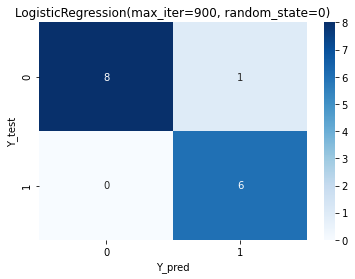

Score :  0.8


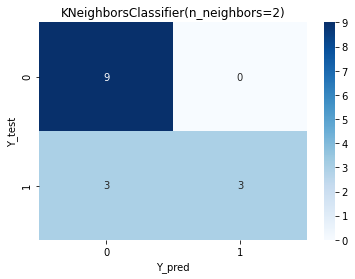

Score :  0.9333333333333333


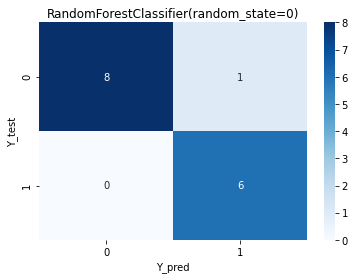

Score :  0.8


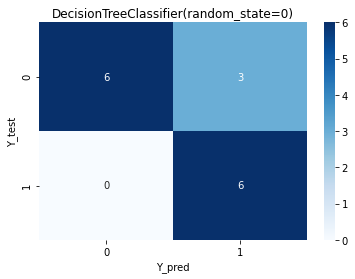

Score :  0.9333333333333333


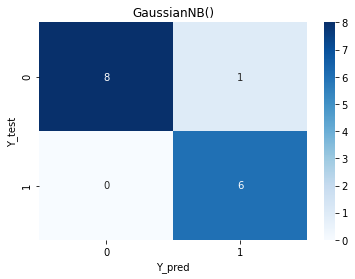

Score :  0.9333333333333333


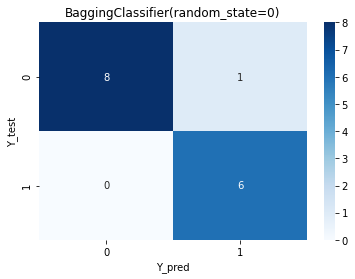

In [47]:
pred_list = [log_reg,knn,rf,tree,nb,bag]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap='Blues')
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [48]:
comparación= pd.DataFrame.from_dict(Comparacion)
comparación

,Modelo,precisión,exactitud,exhaustividad,F1
0,log_reg,0.933333,0.857143,1.0,0.923077
1,knn,0.800000,1.000000,0.5,0.666667
2,tree,0.800000,0.666667,1.0,0.800000
3,rf,0.933333,0.857143,1.0,0.923077
4,nb,0.933333,0.857143,1.0,0.923077
5,bag,0.933333,0.857143,1.0,0.923077


Podemos observar que lo más probable es que estos datos ya hubieran sido tratados con anterioridad, puesto que tiene un ajuste demasiado exacto a los modelos, puesto que dependiendo el random_state que escojamos nos puede dar un modelo perfecto, de ahí que no se escoja uno determinado y que sea aleatorio cada vez, para ver los cambios en las métricas de rendimiento con los distintos modelos de clasificación.